In [7]:
# Datapane will be used create a personal report for this code. Sign up on Datapane to get the token and sign in.

from IPython.display import Javascript

def window_open(url):
    display(Javascript('window.open("{url}");'.format(url=url)))

window_open('https://datapane.com/home')

<IPython.core.display.Javascript object>

In [ ]:
token = input('Insert your token after signing in Datapane ')
print('Your token is', token)

In [ ]:
!datapane login --server=https://datapane.com/ --token=$token

# Plotting SVM Decision Boundary and More on Visualization

Calssify Cancer Data using SVM Algorithm. 

In [8]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [9]:
import numpy as np
import pandas as pd
import time 
import matplotlib.pyplot as plt
import seaborn as sns

import datapane as dp 

In [10]:
cancer = load_breast_cancer()
cancer_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)

In [11]:
cancer_df.head(4)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300


In [12]:
print ("Shape of DataFrame: ", cancer_df.shape)

Shape of DataFrame:  (569, 30)


In [13]:
benign = len(cancer.data[cancer.target==1])
print ("number of benign samples: ", benign)

number of benign samples:  357


In [14]:
print (cancer_df.columns)

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')


In [15]:
# select the columns with names mean, error and worst 
feature_mean  = list(cancer_df.columns[0:10])
feature_error = list(cancer_df.columns[11:20])
feature_worst = list(cancer_df.columns[20:31])

## 1. Initial Feature Analysis to Get to Know the Data-Set Better 

### 1.1. Correlation Plot of 'Mean' Features 

In [16]:
# list to save components for Datapane report
report = []

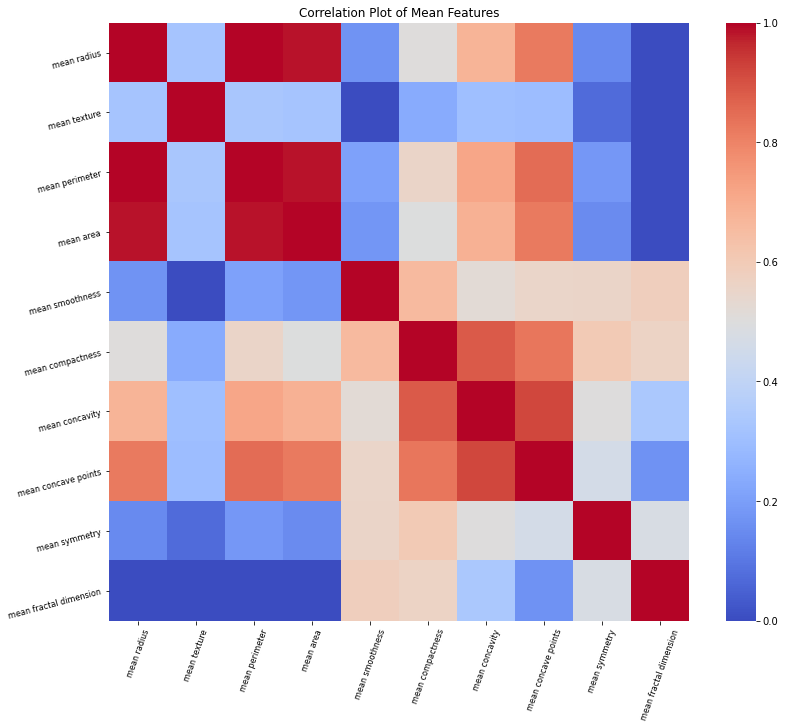

In [17]:
mean_corr = cancer_df[feature_mean].corr()
fig=plt.figure(figsize=(13,11))
g1 = sns.heatmap(mean_corr, cmap='coolwarm', vmin=0, vmax=1)
g1.set_xticklabels(g1.get_xticklabels(), rotation=70, fontsize=8)
g1.set_yticklabels(g1.get_yticklabels(), rotation=15, fontsize=8)
plt.title("Correlation Plot of Mean Features")
plt.savefig("Corr_Mean_Features.png", dpi=200)
plt.show()

In [18]:
report.append(dp.Plot(fig))

### 1.2. Check Some Joint Plots Using Seaborn

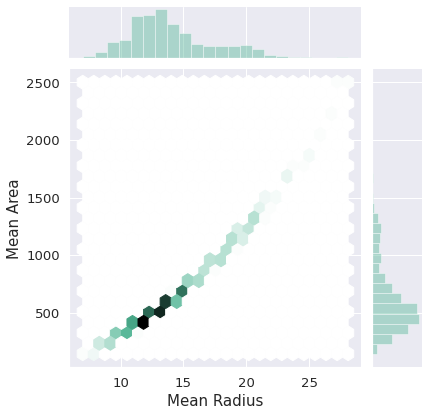

In [19]:
sns.set(font_scale=1.2)
j=sns.jointplot(cancer_df['mean radius'], cancer_df['mean area'], kind='hex', color="#4CB391")
j.set_axis_labels('Mean Radius', 'Mean Area', fontsize=15)
plt.savefig('Mean_Area_Radius.png', dpi=200)

In [20]:
# Append image file to the report
report.append(dp.File(file=dp.Path('./Mean_Area_Radius.png')))

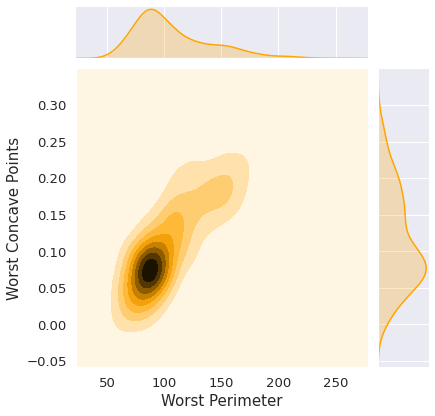

In [21]:
j2 = sns.jointplot(cancer_df['worst perimeter'], cancer_df['worst concave points'], kind='kde', color='orange')
j2.set_axis_labels('Worst Perimeter', 'Worst Concave Points', fontsize=15)
plt.savefig('Worst_Perimeter_ConcaveP.png', dpi=200)

In [22]:
# Append image file to the report
report.append(dp.File(file=dp.Path('./Worst_Perimeter_ConcaveP.png')))

In [23]:
cancer_df_labels = cancer_df.copy()
cancer_df_labels['labels'] = cancer.target
cancer_df_labels.tail(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,labels
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


### 1.3. View Pair Plots to See Some Distributions  

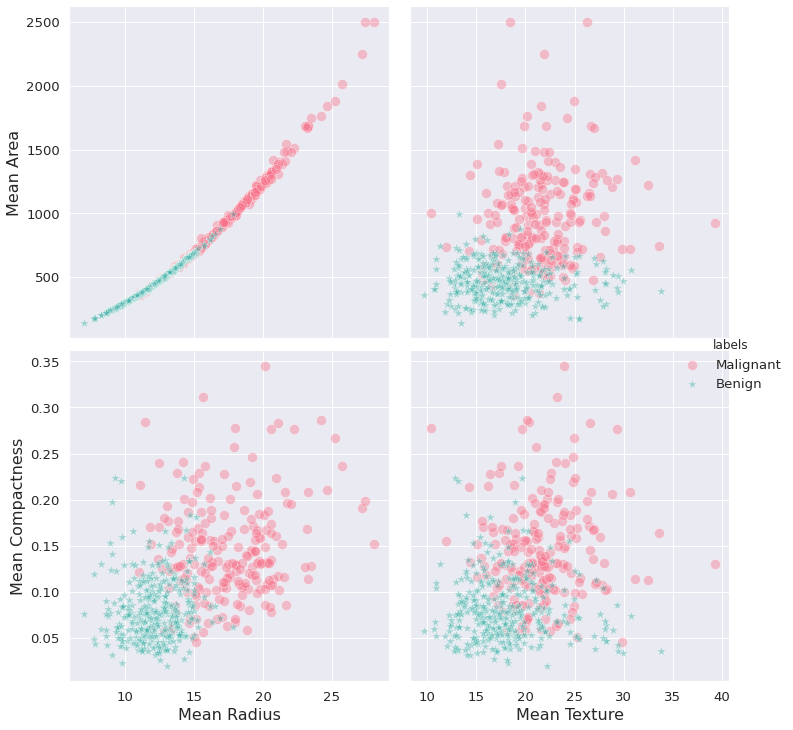

In [24]:
replacements = {'mean radius': 'Mean Radius', 'mean texture': 'Mean Texture',
                'mean area': 'Mean Area', 'mean compactness': 'Mean Compactness', '1':'Benign', '0':'Malignant'}


h = sns.pairplot(cancer_df_labels,
                 x_vars=["mean radius", "mean texture"],
                 y_vars=["mean area", "mean compactness"], hue='labels', palette="husl", 
                 height=5, markers=['o', '*'], 
                 plot_kws=dict(s=100, alpha=0.4))




for ix in range(2):
    for jy in range(2):
        xlabel = h.axes[ix][jy].get_xlabel()
        ylabel = h.axes[ix][jy].get_ylabel()
        if xlabel in replacements.keys():
            h.axes[ix][jy].set_xlabel(replacements[xlabel], fontsize=16)
        if ylabel in replacements.keys():
            h.axes[ix][jy].set_ylabel(replacements[ylabel], fontsize=16)
            
for ixx in range(len(h.fig.get_children()[-1].texts)):
    label = h.fig.get_children()[-1].texts[ixx].get_text()
    if label in replacements.keys():
        h.fig.get_children()[-1].texts[ixx].set_text(replacements[label]) 
plt.savefig('Pairplots_Area_Texture.png', dpi=300)        

In [25]:
# Append image file to the report
report.append(dp.File(file=dp.Path('./Pairplots_Area_Texture.png'))) 

## 2. Prepare to Use the Pipeline Built on PCA, SVM, GridSearchCV

### 2.1. Train and Test Data Separation

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(cancer.data, cancer.target, test_size=0.25, 
                                                    stratify=cancer.target, random_state=30)

print ("train feature shape: ", X_train.shape)
print ("test feature shape: ", X_test.shape)

train feature shape:  (426, 30)
test feature shape:  (143, 30)


### 2.2. Prepare the Pipeline Steps 

* Normalizing the Features with StandardScaler
* Applying Principal Component Analysis
* Use SVM to Classify Malignant and Benign Samples

#### 2.2.1 First Check the Effect of PCA

In [27]:
# For PCA, First Need to Scale the Data.  
scaler1 = StandardScaler()
scaler1.fit(cancer.data)
feature_scaled = scaler1.transform(cancer.data)

# Now Apply PCA

pca1 = PCA(n_components=4)
pca1.fit(feature_scaled)
feature_scaled_pca = pca1.transform(feature_scaled)
print("shape of the scaled and 'PCA'ed features: ", np.shape(feature_scaled_pca))

shape of the scaled and 'PCA'ed features:  (569, 4)


In [28]:
# Let's see the variance to see out of the 
# 4 components which are contributing most 

feat_var = np.var(feature_scaled_pca, axis=0)
feat_var_rat = feat_var/(np.sum(feat_var))

print ("Variance Ratio of the 4 Principal Components Ananlysis: ", feat_var_rat)

Variance Ratio of the 4 Principal Components Ananlysis:  [0.55871858 0.23941873 0.11854291 0.08331978]


As we can see sum of the first two components are contributing almost 80% of the total variance. So it would be interesting to plot these compnents and see how separated the sampels are.  

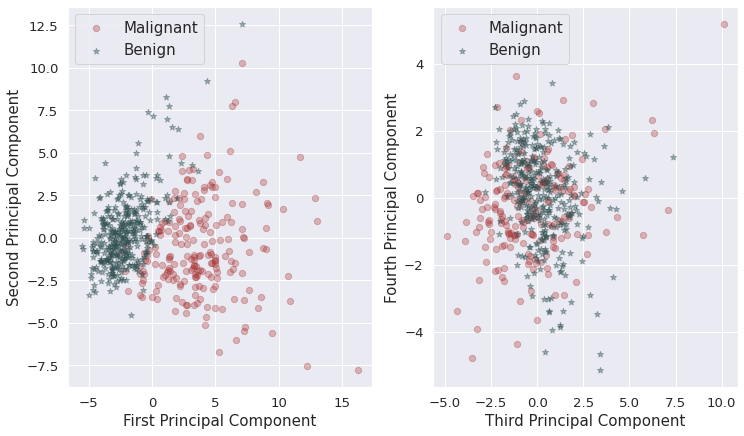

In [29]:
#print (type(cancer.target))
cancer_target_list = cancer.target.tolist()
feature_scaled_pca_X0 = feature_scaled_pca[:, 0]
feature_scaled_pca_X1 = feature_scaled_pca[:, 1]
feature_scaled_pca_X2 = feature_scaled_pca[:, 2]
feature_scaled_pca_X3 = feature_scaled_pca[:, 3]

labels = cancer_target_list
colordict = {0:'brown', 1:'darkslategray'}
piclabel = {0:'Malignant', 1:'Benign'}
markers = {0:'o', 1:'*'}
alphas = {0:0.3, 1:0.4}

fig = plt.figure(figsize=(12, 7))
plt.subplot(1,2,1)
for l in np.unique(labels):
    ix = np.where(labels==l)
    plt.scatter(feature_scaled_pca_X0[ix], feature_scaled_pca_X1[ix], c=colordict[l], 
               label=piclabel[l], s=40, marker=markers[l], alpha=alphas[l])
plt.xlabel("First Principal Component", fontsize=15)
plt.ylabel("Second Principal Component", fontsize=15)

plt.legend(fontsize=15)

plt.subplot(1,2,2)
for l1 in np.unique(labels):
    ix1 = np.where(labels==l1)
    plt.scatter(feature_scaled_pca_X2[ix1], feature_scaled_pca_X3[ix1], c=colordict[l1], 
               label=piclabel[l1], s=40, marker=markers[l1], alpha=alphas[l1])
plt.xlabel("Third Principal Component", fontsize=15)
plt.ylabel("Fourth Principal Component", fontsize=15)

plt.legend(fontsize=15)

plt.savefig('Cancer_labels_PCAs.png', dpi=200)
plt.show()

In [30]:
# Append image file to the report
report.append(dp.File(file=dp.Path('./Cancer_labels_PCAs.png')))

The figure above indeed shows that First and Second Principal Components play more significant roles to classify Maignant and Benign samples, compared to 3rd and 4th components.  

#### 2.2.2 Grid Search Cross-Validation and Best-Fit Paramters

In [31]:
# Pipeline Steps are StandardScaler, PCA and SVM 
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

pipe_steps = [('scaler', StandardScaler()), ('pca', PCA()), ('SupVM', SVC(kernel='rbf'))]

check_params= {
    'pca__n_components': [2], 
    'SupVM__C': [0.1, 0.5, 1, 10,30, 40, 50, 75, 100, 500, 1000], 
    'SupVM__gamma' : [0.001, 0.005, 0.01, 0.05, 0.07, 0.1, 0.5, 1, 5, 10, 50]
}

pipeline = Pipeline(pipe_steps)

In [32]:
# I love You So Much 
from tqdm import tqdm_notebook as tqdm 

In [33]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")



print ("Start Fitting Training Data")
for cv in tqdm(range(4,6)):
    create_grid = GridSearchCV(pipeline, param_grid=check_params, cv=cv)
    create_grid.fit(X_train, Y_train)
    print ("score for %d fold CV := %3.2f" %(cv, create_grid.score(X_test, Y_test)))
    print ("!!!!!!!! Best-Fit Parameters From Training Data !!!!!!!!!!!!!!")
    print (create_grid.best_params_)

print ("out of the loop")

Start Fitting Training Data


score for 4 fold CV := 0.96
!!!!!!!! Best-Fit Parameters From Training Data !!!!!!!!!!!!!!
{'SupVM__C': 50, 'SupVM__gamma': 0.005, 'pca__n_components': 2}
score for 5 fold CV := 0.94
!!!!!!!! Best-Fit Parameters From Training Data !!!!!!!!!!!!!!
{'SupVM__C': 40, 'SupVM__gamma': 0.005, 'pca__n_components': 2}

out of the loop


In [34]:
print ("grid best params: ", create_grid.best_params_) 
# use the best one

grid best params:  {'SupVM__C': 40, 'SupVM__gamma': 0.005, 'pca__n_components': 2}


### 2.3. Prediction and Confusion Matrix 

Confusion Matrix: 

[[46  7]
 [ 2 88]]


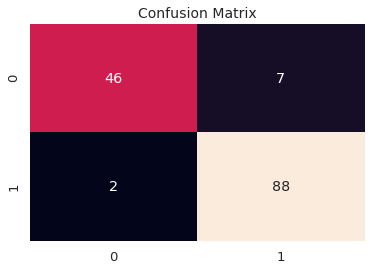

In [35]:
# Time for Prediction and Plotting Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

Y_pred = create_grid.predict(X_test)
# print (Y_pred)
cm = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix: \n")
print(cm)


df_cm = pd.DataFrame(cm, range(2), range(2))

sns.heatmap(df_cm, annot=True, cbar=False)
plt.title("Confusion Matrix", fontsize=14)
plt.savefig("Confusion Matrix.png", dpi=200)

In [36]:
# Append image file to the report
report.append(dp.File(file=dp.Path('./Confusion Matrix.png')))

## 3. Plot the Decision Boundary

Visualizing the decision boundary properly, requires only 2 components and that's why we choose number of components in PCA as 2.  Now we select the test data-set apply 
* StandardScaler, 
* PCA with 2 components, 
* SVM with radial basis function Kernel and fit parameters obtained from grid search. 

#### 2D Decision Boundary 

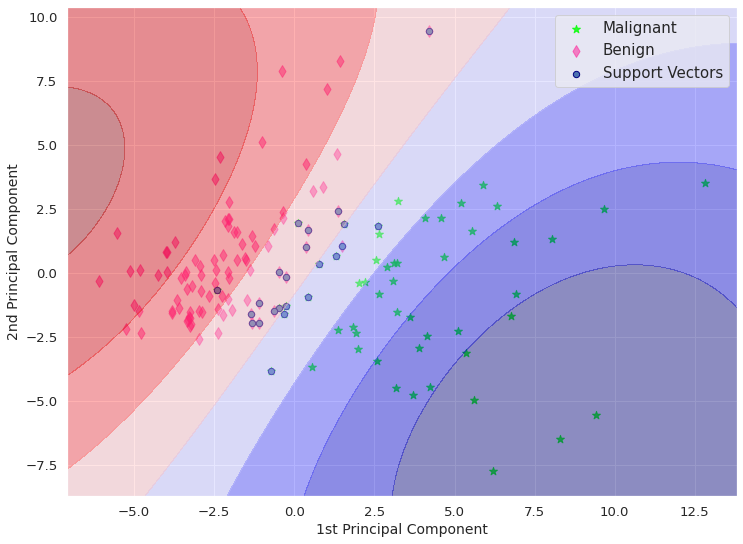

In [37]:
scaler1 = StandardScaler()
scaler1.fit(X_test)
X_test_scaled = scaler1.transform(X_test)


pca1 = PCA(n_components=2)
X_test_scaled_reduced = pca1.fit_transform(X_test_scaled)


svm_model = SVC(kernel='rbf', C=float(create_grid.best_params_['SupVM__C']), 
                gamma=float(create_grid.best_params_['SupVM__gamma']))

classify = svm_model.fit(X_test_scaled_reduced, Y_test)

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

def make_meshgrid(x, y, h=.1):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))#,
    return xx, yy

X0, X1 = X_test_scaled_reduced[:, 0], X_test_scaled_reduced[:, 1]
xx, yy = make_meshgrid(X0, X1)

fig, ax = plt.subplots(figsize=(12,9))
fig.patch.set_facecolor('white')
cdict1={0:'lime',1:'deeppink'}

Y_tar_list = Y_test.tolist()
yl1= [int(target1) for target1 in Y_tar_list]
labels1=yl1
 
labl1={0:'Malignant',1:'Benign'}
marker1={0:'*',1:'d'}
alpha1={0:.8, 1:0.5}

for l1 in np.unique(labels1):
    ix1=np.where(labels1==l1)
    ax.scatter(X0[ix1],X1[ix1], c=cdict1[l1],label=labl1[l1],s=70,marker=marker1[l1],alpha=alpha1[l1])

ax.scatter(svm_model.support_vectors_[:, 0], svm_model.support_vectors_[:, 1], s=40, 
           edgecolors='navy', label='Support Vectors')

plot_contours(ax, classify, xx, yy,cmap='seismic', alpha=0.4)
plt.legend(fontsize=15)

plt.xlabel("1st Principal Component",fontsize=14)
plt.ylabel("2nd Principal Component",fontsize=14)

#plt.savefig('ClassifyMalignant_Benign2D_Decs_FunctG10.png', dpi=300)
plt.show()

In [38]:
report.append(dp.Plot(fig))

#### Decision Boundary with axes Projection set to 3D

In [39]:
scaler1 = StandardScaler()
scaler1.fit(X_test)
X_test_scaled = scaler1.transform(X_test)


pca1 = PCA(n_components=2)
X_test_scaled_reduced = pca1.fit_transform(X_test_scaled)



svm_model = SVC(kernel='rbf', C=1., 
                gamma=.5)

classify = svm_model.fit(X_test_scaled_reduced, Y_test)




from mpl_toolkits import mplot3d
from matplotlib import animation

def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out




def make_meshgrid(x, y, h=.2):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))#,
    return xx, yy


X0, X1 = X_test_scaled_reduced[:, 0], X_test_scaled_reduced[:, 1]
xx, yy = make_meshgrid(X0, X1)

# print ("shape of X0: ", X0.shape)
# print ("shape of X1: ", X1.shape)

fig, ax1 = plt.subplots(figsize=(12,9))
ax1 = fig.gca(projection='3d')
ax1.view_init(50, 40)
fig.patch.set_facecolor('white')
cdict1={0:'lime',1:'deeppink'}

Y_tar_list = Y_test.tolist()
yl1= [int(target1) for target1 in Y_tar_list]
labels1=yl1
 

labl1={0:'Malignant',1:'Benign'}
marker1={0:'*',1:'d'}
alpha1={0:.8, 1:0.5}



# plt.savefig('ClassifyMalignant_Benign3D_.png', dpi=300)
def animate(k):
    ax1.view_init(elev=k, azim=40)


    
def plot3DBound():
    for l1 in np.unique(labels1):
        ix1=np.where(labels1==l1)
        ax1.scatter(X0[ix1],X1[ix1], c=cdict1[l1],label=labl1[l1],s=70,marker=marker1[l1],alpha=alpha1[l1])

    ax1.scatter(svm_model.support_vectors_[:, 0], svm_model.support_vectors_[:, 1], s=40, edgecolors='navy', label='Support Vectors')    

    plot_contours(ax1, classify, xx, yy,cmap='seismic', alpha=0.4)
    plt.xlabel("1st Principal Component",fontsize=14)
    plt.ylabel("2nd Principal Component",fontsize=14)
    plt.legend(fontsize=15)
    return fig, 

    
    
# plot3DBound()
    
ani = animation.FuncAnimation(fig, animate, init_func=plot3DBound, frames=300, interval=100, blit=False)
writer = animation.FFMpegFileWriter(fps=20, extra_args=['-vcodec', 'libx264'])



ani.save('SVM3DBoundaryanim.mp4', writer=writer)
    
    
# plt.show()

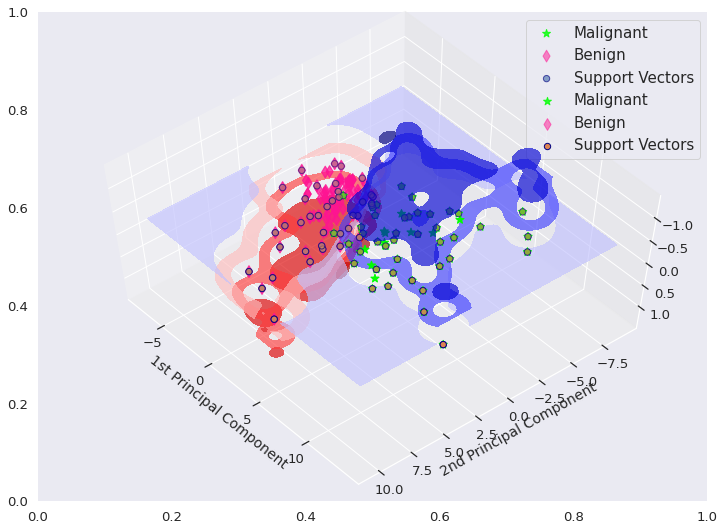

In [40]:
report.append(dp.Plot(fig))

In [41]:
report.insert(0, dp.Markdown(f'''
[Original article](https://towardsdatascience.com/visualizing-support-vector-machine-decision-boundary-69e7591dacea)

[Source code](https://github.com/khuyentran1401/Machine_Learning/blob/master/machine_learning/SVM_Decision_Boundary/Decision_Boundary_SVM.ipynb)

[Run on Binder](https://mybinder.org/v2/gh/khuyentran1401/Machine_Learning/ce7fae1c5d9fab8eefcd624674c10afaa1704bbd?filepath=machine_learning%2FSVM_Decision_Boundary%2FDecision_Boundary_SVM.ipynb')
'''))

In [42]:
dp.Report(*report).publish(name='svm', 
                          visibility='PUBLIC' #Commend out this line if you want your report to be private
                               )

Publishing report and associated data - please wait..
Report successfully published at https://datapane.com/saptashwa/reports/svm_58bdadb9/
